In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv')

In [3]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [5]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [6]:
df[df['neighbourhood group']=='brooln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license


In [7]:
import pandas as pd

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Drop unnecessary columns
df.drop(['house_rules', 'license'], axis=1, inplace=True, errors='ignore')

# Remove '$' and ',' from price and service fee columns
df['price'] = df['price'].str.replace('$', '', regex=False)
df['service fee'] = df['service fee'].str.replace('$', '', regex=False)

df['price'] = df['price'].str.replace(',', '', regex=False)
df['service fee'] = df['service fee'].str.replace(',', '', regex=False)

# Rename columns for clarity
df.rename(columns={
    'price': 'price_$',
    'service fee': 'service_fee_$'
}, inplace=True)

# Drop missing values
df.dropna(inplace=True)

# Convert columns to correct data types
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
df['Construction year'] = df['Construction year'].astype(int)

# Fix typo: 'brooln' should be 'Brooklyn'
# Also, column name was misspelled as 'neighberhood group'
df.loc[df['neighbourhood group'] == 'brooln', 'neighbourhood group'] = 'Brooklyn'

# Remove rows where availability exceeds 365 days
df = df[df['availability 365'] <= 365]


In [8]:
df.duplicated().value_counts()

,count
False,81263


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81263 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              81263 non-null  object        
 1   NAME                            81263 non-null  object        
 2   host id                         81263 non-null  object        
 3   host_identity_verified          81263 non-null  object        
 4   host name                       81263 non-null  object        
 5   neighbourhood group             81263 non-null  object        
 6   neighbourhood                   81263 non-null  object        
 7   lat                             81263 non-null  float64       
 8   long                            81263 non-null  float64       
 9   country                         81263 non-null  object        
 10  country code                    81263 non-null  object        
 11  instan

In [10]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,81263.000000,81263.000000,81263.000000,81263.000000,81263.000000,81263.000000,81263.000000,81263,81263.000000,81263.000000,81263.000000,81263.000000
mean,40.727260,-73.948261,2012.490666,626.626177,125.326274,7.417349,32.025190,2019-06-21 04:15:15.604887808,1.391148,3.286391,7.106543,135.031847
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687620,-73.982060,2008.000000,341.000000,68.000000,2.000000,3.000000,2018-11-04 00:00:00,0.230000,2.000000,1.000000,5.000000
50%,40.721240,-73.953590,2012.000000,626.000000,125.000000,3.000000,11.000000,2019-06-14 00:00:00,0.760000,3.000000,1.000000,92.000000
75%,40.762490,-73.930490,2017.000000,915.000000,183.000000,5.000000,38.000000,2019-07-06 00:00:00,2.030000,4.000000,2.000000,253.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,365.000000
std,0.056389,0.050630,5.761114,331.747348,66.352801,28.362955,51.669175,NaN,1.761232,1.278644,29.850375,128.453532


In [11]:
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,42932
Private room,36609
Shared room,1614
Hotel room,108


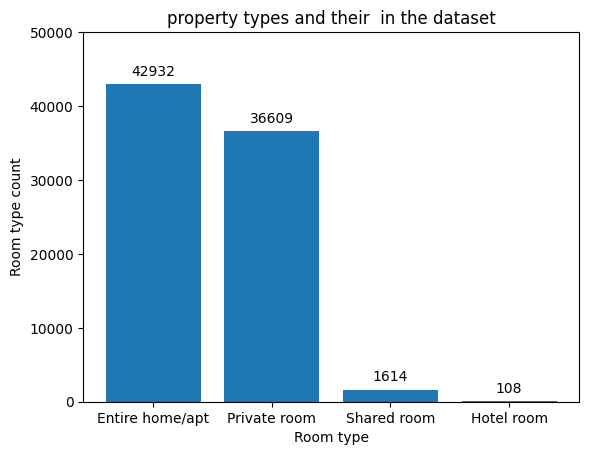

In [12]:
room_type_bar = plt.bar(property_types.index,property_types.loc[:,'count']);
plt.bar_label(room_type_bar, labels = property_types.loc[:,'count'], padding=4);
plt.ylim([0,50000]);
plt.xlabel('Room type');
plt.ylabel('Room type count');
plt.title('property types and their  in the dataset');

In [13]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,33721
Manhattan,33547
Queens,10948
Bronx,2241
Staten Island,805
brookln,1


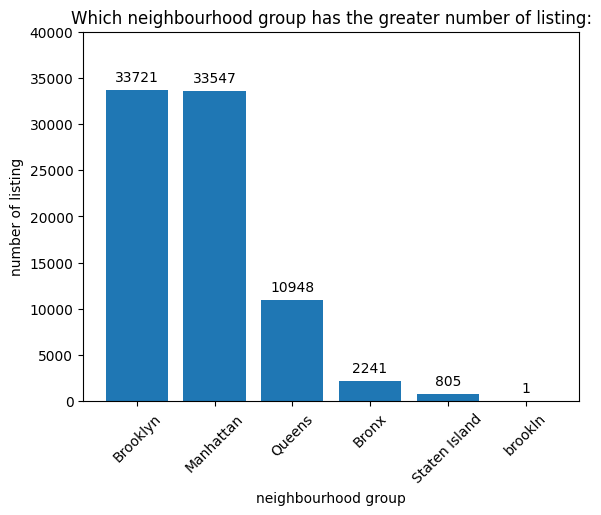

In [14]:
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,'count']);
plt.bar_label(hood_group_bar, labels = hood_group.loc[:,'count'], padding=4);
plt.ylim([0,40000]);
plt.xlabel('neighbourhood group');
plt.ylabel('number of listing');
plt.xticks(rotation = 45)
plt.title('Which neighbourhood group has the greater number of listing:');

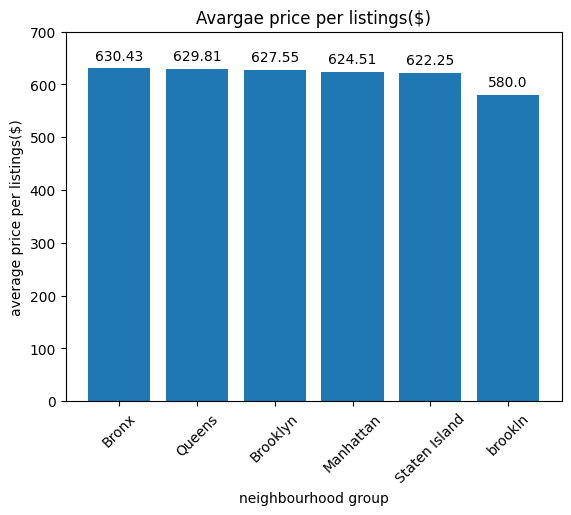

In [15]:
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:,'price_$']);
plt.bar_label(avg_price_bar,labels = round(avg_price.loc[:,'price_$'],2),label_type = 'edge', padding=4);
plt.ylim([0,700]);
plt.xlabel('neighbourhood group');
plt.ylabel('average price per listings($)');
plt.xticks(rotation = 45)
plt.title('Avargae price per listings($)');

Text(0.5, 1.0, 'Average price $ for properties in each construction year ')

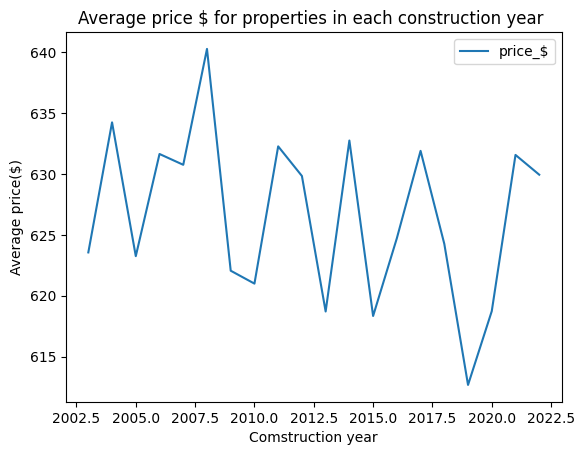

In [16]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot()
plt.xlabel('Comstruction year');
plt.ylabel('Average price($)');
plt.title('Average price $ for properties in each construction year ')


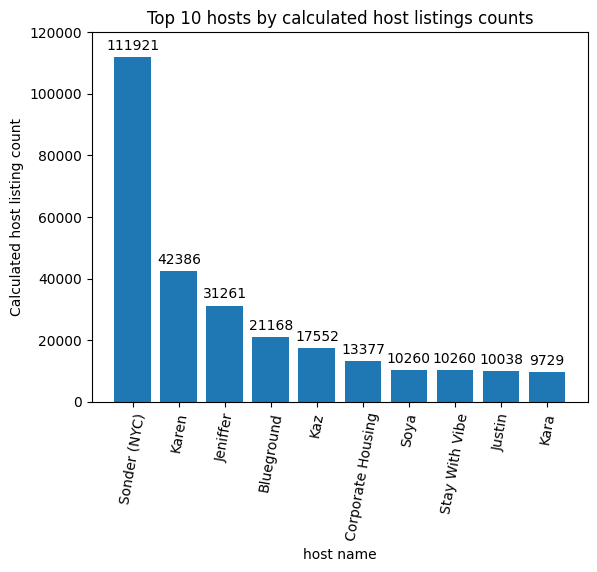

In [17]:
host = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending =False).nlargest(10).to_frame()
hosts_bar = plt.bar(host.index, host.loc[:,'calculated host listings count']);
plt.bar_label(hosts_bar,label = host.loc[:,'calculated host listings count'],label_type='edge',padding=3);
plt.xlabel('host name');
plt.ylabel('Calculated host listing count');
plt.xticks(rotation = 80);
plt.ylim([0,120000]);
plt.title('Top 10 hosts by calculated host listings counts');

In [18]:
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.289849
unconfirmed,3.282933


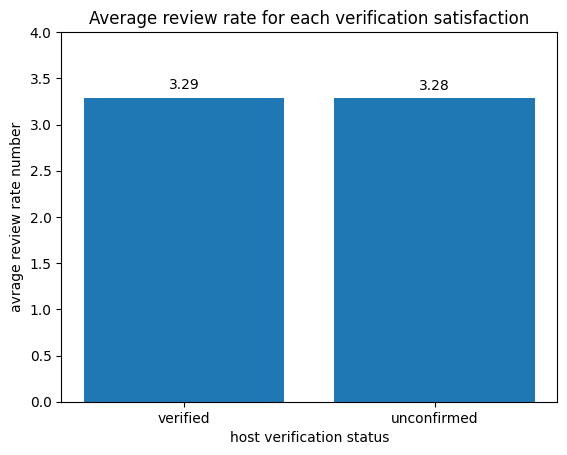

In [19]:
review_bar = plt.bar(review.index, review.loc[:,"review rate number"]);
plt.bar_label(review_bar,labels=round(review.loc[:,"review rate number"],2),padding=4);
plt.xlabel('host verification status');
plt.ylabel('avrage review rate number');
plt.ylim([0,4]);
plt.title('Average review rate for each verification satisfaction');

In [20]:
df['price_$'].corr(df['service_fee_$'])



np.float64(0.9999908997036285)

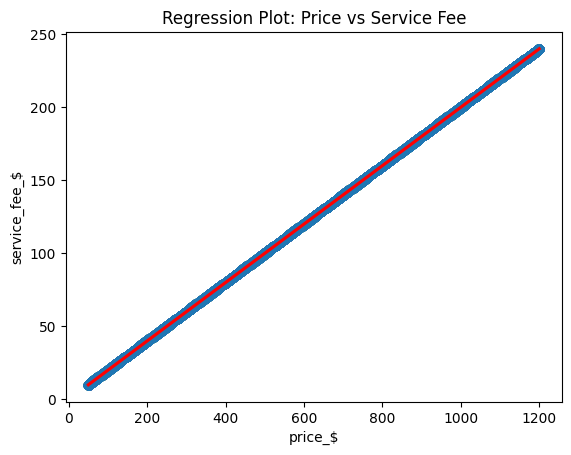

In [21]:
sns.regplot(x='price_$', y='service_fee_$', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Regression Plot: Price vs Service Fee')
plt.xlabel('price_$')
plt.ylabel('service_fee_$')
plt.show()

In [22]:
ARNI = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARNI

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.378190
                    Private room               3.315789
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.251608
                    Hotel room                 3.833333
                    Private room               3.283480
                    Shared room                3.327759
Manhattan           Entire home/apt            3.274865
                    Hotel room                 3.500000
                    Private room               3.293528
                    Shared room                3.269350
Queens              Entire home/apt            3.358646
                    Hotel room                 3.750000
                    Private room               3.317546
                    Shared room                3.326087
Staten Island       Entire home/apt            3.326877
                    Private room               3.490909
                    Shared room                3.714286
brookln             Private room               4.000000

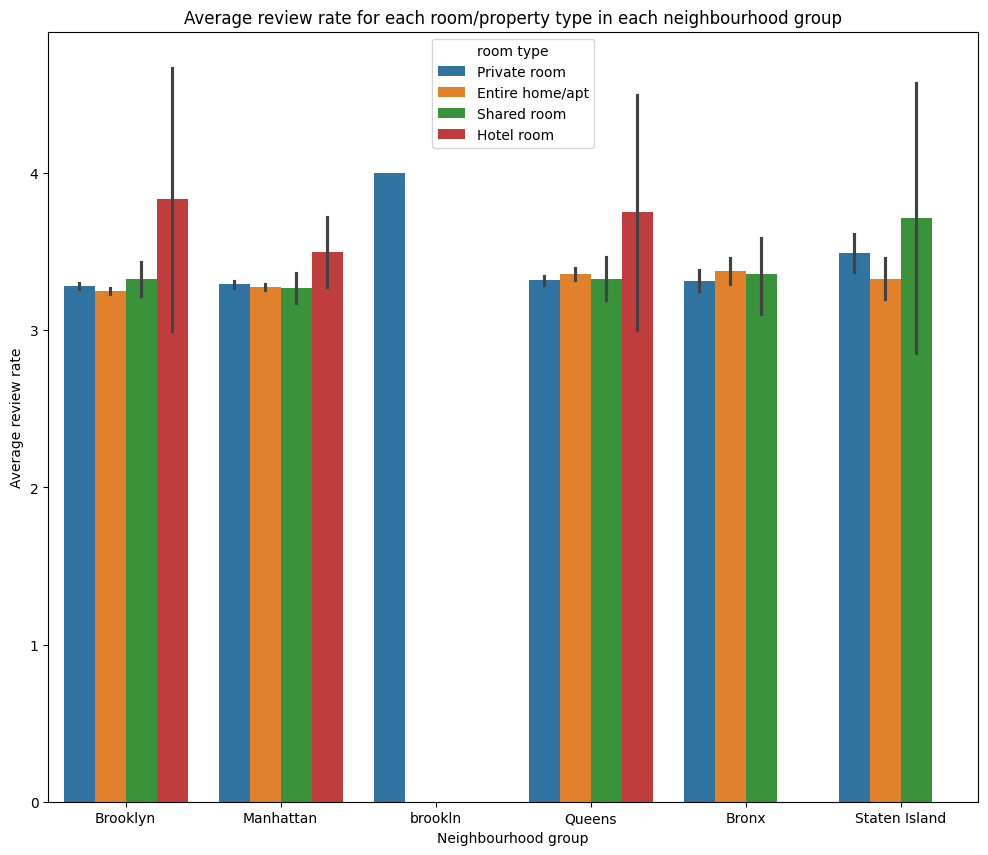

In [23]:
plt.figure(figsize = [12,10]);
sns.barplot(data = df, x= 'neighbourhood group', y = 'review rate number', hue = 'room type');
plt.xlabel('Neighbourhood group');
plt.ylabel('Average review rate');
plt.title('Average review rate for each room/property type in each neighbourhood group');

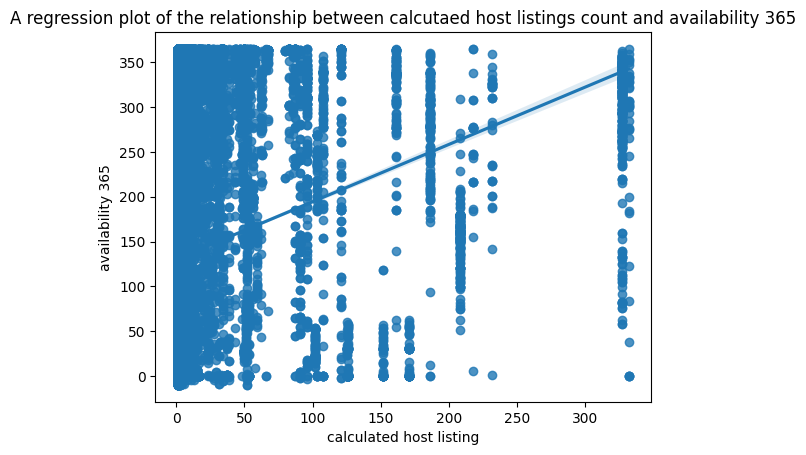

In [24]:
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365');
plt.xlabel('calculated host listing');
plt.ylabel('availability 365');
plt.title('A regression plot of the relationship between calcutaed host listings count and availability 365');

In [25]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.14856264998419236)

In [ ]:
The Pearson correlation coefficient for the association between calculated host listings and avilability 365 is 0.136,including a weak np.positive correlation between thetwo vairiable.

The Pearson correlation coefficient for the association between calculated host listings and avilability 365 is 0.136,including a weak positive correlation between thetwo vairiable.

Conclusion

In conclusion, this project has provided a comprehensive analysis of the New York City Airbnb dataset, shedding light on various aspects of the short-term lodging market. Through data wrangling, exploratory data analysis (EDA), and interpretation of summary statistics, we've uncovered valuable insights into listing distribution, pricing dynamics, host, and review analysis.

Key findings include the dominance in counts of Entire home/apt listings, the variability in listing counts across neighborhood groups, and the downward trend between property construction year and price Additionally, the analysis highlighted the significance of verified host status on review rates, as well as the strong correlation between listing price and service fee

Furthermore, conducting sentiment analysis on guest reviews to understand factors driving customer satisfaction and preferences could inform targeted marketing strategies and product improvements for Airbnb Lastly, expanding the analysis to include predictive modeling techniques, such as regression or machine learning algorithms, could enable forecasting of listing demand, pricing trends, and customer behavior, facilitating strategic decision-making for stakeholders in the short term lodging industry.